In [8]:
import pandas as pd


In [52]:
!git clone https://github.com/spring-projects/spring-framework.git spring

fatal: destination path 'spring' already exists and is not an empty directory.


In [9]:
!git log --name-only --no-merges --pretty=format: | sort | uniq -c | sort -nr | awk '{$1=$1};1' | sed -e 's/\s\+/,/g' > test.csv

In [17]:
git_log = pd.read_csv('../spring/test.csv', names=["filepath"])

In [18]:
git_log.head()

,filepath
0,spring-websocket/src/main/java/org/springframe...
1,spring-websocket/src/main/java/org/springframe...
2,spring-websocket/src/main/java/org/springframe...
3,spring-websocket/src/main/java/org/springframe...
4,spring-websocket/src/main/java/org/springframe...


In [19]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147463 entries, 0 to 147462
Data columns (total 1 columns):
filepath    147463 non-null object
dtypes: object(1)
memory usage: 1.1+ MB


In [26]:
top30 = git_log.filepath.value_counts().head(30)
top30

build.gradle                                                                                                                          1319
src/asciidoc/index.adoc                                                                                                                239
build-spring-framework/resources/changelog.txt                                                                                         187
spring-core/src/main/java/org/springframework/core/annotation/AnnotationUtils.java                                                     171
spring-beans/src/main/java/org/springframework/beans/factory/support/DefaultListableBeanFactory.java                                   160
src/docs/asciidoc/web/webmvc.adoc                                                                                                      120
src/dist/changelog.txt                                                                                                                 119
spring-context/src/main/jav

In [27]:
%matplotlib inline

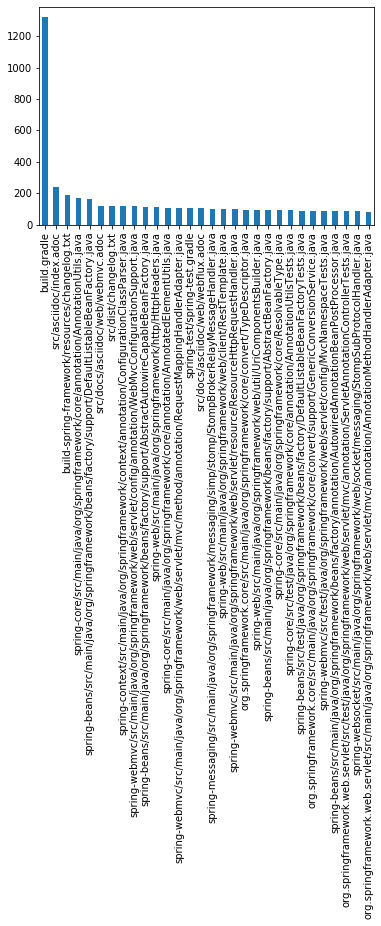

In [29]:
top30.plot.bar()

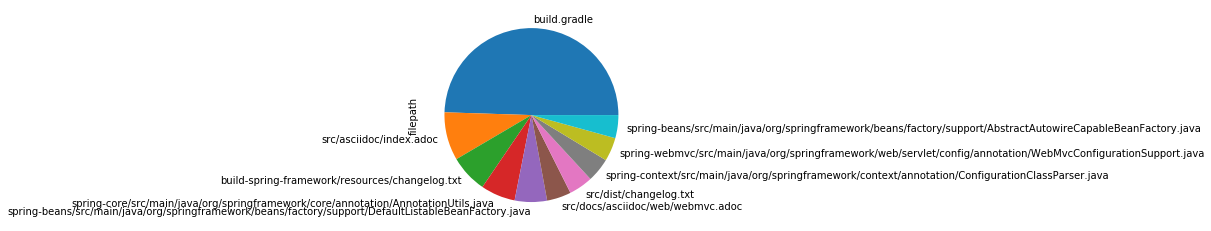

In [24]:
top10.plot.pie();

In [89]:
git_log.timestamp = pd.to_datetime(git_log.timestamp,utc=True)
git_log.head()

,timestamp,author
0,2019-11-26 12:08:22+00:00,Rossen Stoyanchev
1,2019-11-26 12:04:00+00:00,Rossen Stoyanchev
2,2019-11-26 10:44:09+00:00,Rossen Stoyanchev
3,2019-11-26 09:50:08+00:00,Arjen Poutsma
4,2019-11-25 17:27:34+00:00,Arjen Poutsma


In [90]:
git_log.timestamp.dt.hour.head()

0    12
1    12
2    10
3     9
4    17
Name: timestamp, dtype: int64

In [91]:
commits_per_hour = git_log.timestamp.dt.hour.value_counts(sort=False)
commits_per_hour.head()

0      448
16    1223
1      421
17    1045
2      281
Name: timestamp, dtype: int64

Text(0, 0.5, 'Number of Commits')

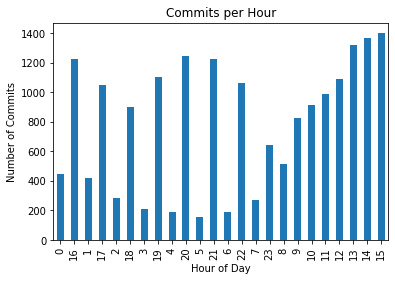

In [92]:
ax = commits_per_hour.plot.bar()
ax.set_title("Commits per Hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Commits")

In [93]:
commits_per_weekday = git_log.timestamp.dt.weekday.value_counts(sort=False)
commits_per_weekday

0    3177
1    3661
2    3539
3    3370
4    3175
5    1132
6     972
Name: timestamp, dtype: int64

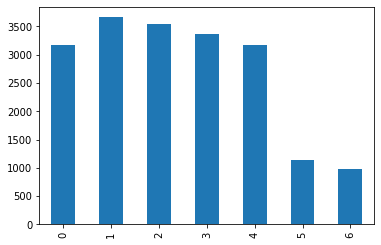

In [94]:
commits_per_weekday.plot.bar();

In [95]:
git_timed = git_log.set_index('timestamp').author
git_timed.head()
commits_per_day = git_timed.resample("D").count()
commits_per_day.head()

timestamp
2008-07-10 00:00:00+00:00    2
2008-07-11 00:00:00+00:00    1
2008-07-12 00:00:00+00:00    0
2008-07-13 00:00:00+00:00    0
2008-07-14 00:00:00+00:00    0
Freq: D, Name: author, dtype: int64

In [96]:
commits_per_day_cumulative = commits_per_day.cumsum()
commits_per_day_cumulative.head()

timestamp
2008-07-10 00:00:00+00:00    2
2008-07-11 00:00:00+00:00    3
2008-07-12 00:00:00+00:00    3
2008-07-13 00:00:00+00:00    3
2008-07-14 00:00:00+00:00    3
Freq: D, Name: author, dtype: int64

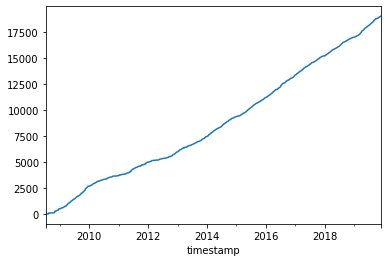

In [97]:
commits_per_day_cumulative.plot()